In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import os
import pandas as pd
from scipy.optimize import curve_fit
from decimal import Decimal
import matplotlib.style as mplstyle

mplstyle.use('seaborn')
sns.set_style("dark", {'axes.grid' : True})

In [2]:
def polyfit(x, y, degree):
    coeffs = np.polyfit(x, y, degree)

    # r-squared
    p = np.poly1d(coeffs)
    
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    r2 = ssreg / sstot
    
    return coeffs, p, r2

In [3]:
def fit_and_plot(x, y, yerr, degree, xlabel, ylabel, title, savefig=False):
    coeffs, p, r2 = polyfit(x, y, degree=degree)
    print(coeffs, r2)

    xp = np.logspace(1,5,100)
    label_eq = ''
    for i in range(0, len(coeffs)):
        label_eq += f'{coeffs[i]:.2E}'
        if i < len(coeffs)-1:
            label_eq += f'$x^{len(coeffs)-1-i}$ + '
    label_eq += f'\n $R^2$ = {r2:.4f}'

    ax = pl.subplot()
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    pl.errorbar(x, y, yerr=yerr, fmt='o', color='C0')
    pl.plot(xp, p(xp), label=label_eq, color='C0', alpha=0.7)
    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    pl.legend(loc='best')
    pl.title(title)
    
    if savefig is True:
        pl.savefig(f'{title}.png', dpi=300)

In [4]:
def open_runtimecsv(dirs):
    temp = []
    cwd = os.getcwd()
    filename = 'runtime-summary.csv'
    indices = np.arange(0, 100, 1)
    for foldir in dirs:
        datadir = os.path.join(cwd, foldir)
        fullpath = os.path.join(datadir, filename)
        df = pd.read_csv(fullpath, delimiter='\t')
        temp.append(df)
    if len(temp) > 0:
        df = pd.concat(temp)
    return df

In [5]:
dirs = ['anisotropic', 'isotropic']
df1 = open_runtimecsv(dirs)

In [6]:
df1.sort_values(by=['scatterers'])

,Unnamed: 0,photons,steps,scatterers,process runtime mean,actual runtime mean,process runtime std,actual runtime std
0,0,30000.0,100.0,0.0,0.948301,25.125826,0.017783,1.547199
0,0,30000.0,100.0,0.0,1.179117,42.627565,0.024759,0.153437
1,1,30000.0,100.0,39.0,1.414481,129.673072,0.044114,4.492422
2,2,30000.0,100.0,79.0,1.447287,220.873423,0.076453,9.250898
3,3,30000.0,100.0,118.0,1.572587,334.431311,0.121356,13.278210
4,4,30000.0,100.0,158.0,1.548282,398.966478,0.035504,9.262074
1,1,30000.0,100.0,2904.0,8.119054,11198.868399,0.063720,14.836103
2,2,30000.0,100.0,5809.0,15.554913,22029.632531,0.051898,29.276246
3,3,30000.0,100.0,8714.0,23.630745,32708.302141,0.093138,30.450918


[  3.77448913 -19.63000084] 0.9998669117677289


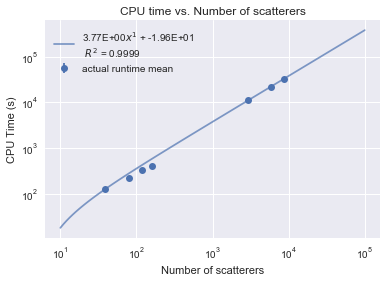

In [12]:
fit_and_plot(df1['scatterers'], df1['actual runtime mean'], df1['actual runtime std'],
             degree=1, xlabel='Number of scatterers', ylabel='CPU Time (s)',
             title='CPU time vs. Number of scatterers', savefig=True)

In [8]:
dir2 = ['varying_numphotons']
df2 = open_runtimecsv(dir2)
df2

,Unnamed: 0,photons,steps,scatterers,process runtime mean,actual runtime mean,process runtime std,actual runtime std
0,0,1000,100.0,373.0,0.220762,30.467663,0.004026,0.142654
1,1,2154,100.0,373.0,0.277795,62.773296,0.002639,0.450117
2,2,4641,100.0,373.0,0.384313,135.491312,0.010132,0.375768
3,3,10000,100.0,373.0,0.630487,293.237997,0.021202,5.412189
4,4,21544,100.0,373.0,1.152979,630.165717,0.083615,16.528345
5,5,46415,100.0,373.0,2.346169,1363.545460,0.293002,50.267258
6,6,100000,100.0,373.0,5.350471,2919.305047,0.307617,94.643219


[0.0292074  1.37074963] 0.9999917697985686


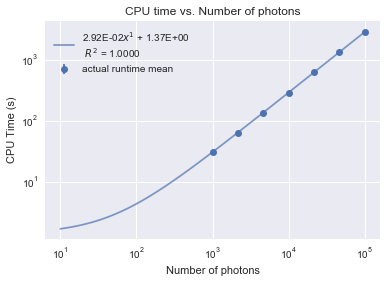

In [13]:
fit_and_plot(df2['photons'], df2['actual runtime mean'], df2['actual runtime std'],
             degree=1, xlabel='Number of photons', ylabel='CPU Time (s)',
             title='CPU time vs. Number of photons', savefig=True)

In [10]:
dir3 = ['tradeoffs_stepsizeparam']
df3 = open_runtimecsv(dir3)
df3

,Unnamed: 0,photons,steps,scatterers,process runtime mean,actual runtime mean,process runtime std,actual runtime std
0,0,30000.0,30,373.0,0.724806,295.622449,0.027966,8.858176
1,1,30000.0,50,373.0,1.032115,520.473412,0.072777,78.559382
2,2,30000.0,70,373.0,1.331308,677.091240,0.061372,15.696443
3,3,30000.0,90,373.0,1.853467,923.721717,0.123516,19.146634
4,4,30000.0,110,373.0,2.442492,1188.583689,0.192893,54.861449


[ 10.94585392 -45.11127283] 0.9926087039719732


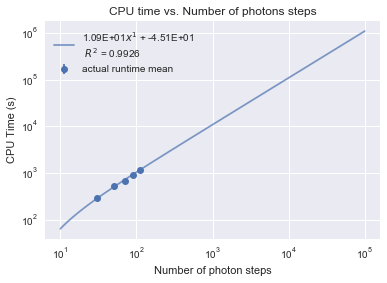

In [14]:
fit_and_plot(df3['steps'], df3['actual runtime mean'], df3['actual runtime std'],
             degree=1, xlabel='Number of photon steps', ylabel='CPU Time (s)',
             title='CPU time vs. Number of photons steps', savefig=True)

[ 0.02128362 -0.01301574] 0.9747817196570177


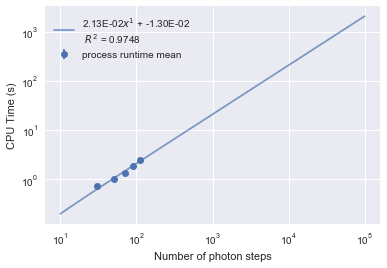

In [20]:
fit_and_plot(df3['steps'], df3['process runtime mean'], df3['process runtime std'],
             degree=1, xlabel='Number of photon steps', ylabel='CPU Time (s)', title='')

Proposed cost function:
\begin{equation}
    C = (\alpha x + \alpha_0) (\beta y + \beta_0) (\gamma x + \gamma_0)
\end{equation}